# Cloning quasar

In [1]:
from astroML.datasets import fetch_dr7_quasar
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

C:\Users\utente\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift'] #redshift of the quasar

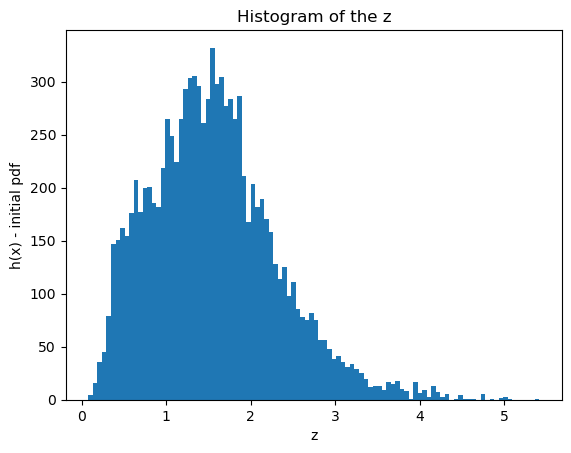

In [3]:
# I draw the histogram
plt.hist(z, bins = 100)

plt.xlabel("z")
plt.ylabel("h(x) - initial pdf")
plt.title("Histogram of the z")
plt.show()

# Rejection sampling

click here https://stackoverflow.com/questions/20128898/get-data-points-from-a-histogram-in-python to have more information.

## a)
Let show the distribution h(x)

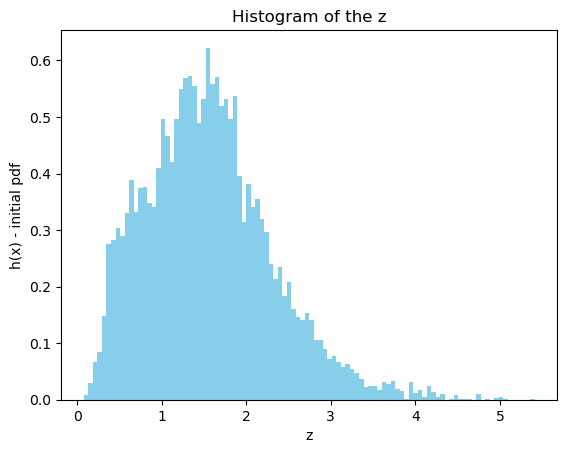

In [4]:
N=100000
counts, bins , bars =plt.hist(z, bins= 100, density = True, color='skyblue')

y=np.random.uniform(0,0.65,N)
x=np.random.uniform(min(z),max(z),N)
takex=[]
takey=[]
rejectionx=[]
rejectiony=[]

plt.xlabel("z")
plt.ylabel("h(x) - initial pdf")
plt.title("Histogram of the z")
plt.show()

## b) 
Let us generate a random sample from q(x), where q(x) is the uniform distribution.

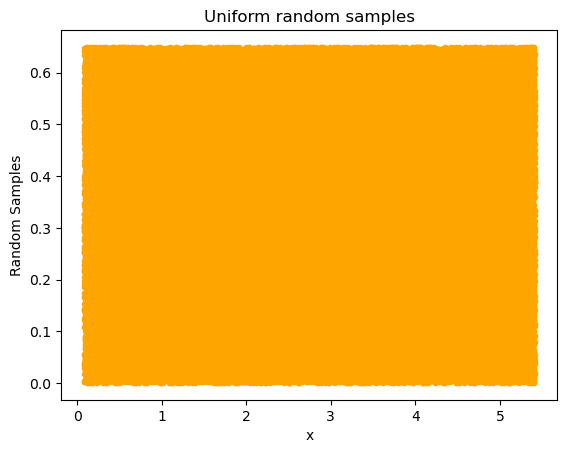

In [5]:
plt.scatter(x,y, color = 'orange',marker='.')
plt.xlabel("x")
plt.ylabel("Random Samples")
plt.title("Uniform random samples")
plt.show()

## c)
Let us select the samples under the histogram (h(x) distribution).

Text(0.5, 1.0, 'Data under the h(x) function')

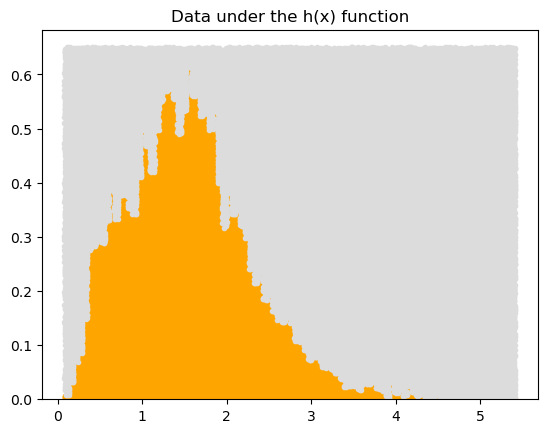

In [6]:
for i in range(len(x)):
    for j in range(len(counts)):
        if  x[i]>bins[j] and  x[i]<bins[j+1]:
            if y[i]<counts[j]:
                takex.append(x[i]) #np.append serve a riempire l'array in modo da avere un array con i valori in tutte le posizioni
                takey.append(y[i])
            else:
                rejectionx.append(x[i])
                rejectiony.append(y[i])

h=plt.hist(z, bins= 100, density = True, color='skyblue')
plt.scatter(takex,takey, color = 'orange',marker='.')
plt.scatter(rejectionx,rejectiony, color = 'gainsboro',marker='.')

plt.title("Data under the h(x) function")


h=plt.hist(z, bins= 100, density = True, color='skyblue')
plt.scatter(x[0] ,h[0][0])

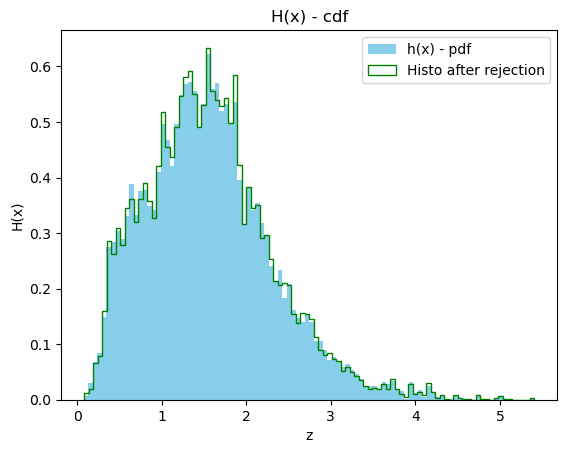

In [7]:
plt.hist(z, bins= 100, density = True,color='skyblue' ,label ="h(x) - pdf")
plt.hist(takex, bins= 100, density = True,histtype='step',color='green' ,label = "Histo after rejection")

plt.xlabel("z")
plt.ylabel("H(x)")
plt.title("H(x) - cdf")

plt.legend()
plt.show()

- **KS test**

In [8]:
stats.ks_2samp(z,takex)

KstestResult(statistic=0.004689687057930519, pvalue=0.996497411836376)

# Inverse transform sampling

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html

## a)
Now I am goin to calculate the cdf (H(x)) from the initial function distribution h(x) (histogram)

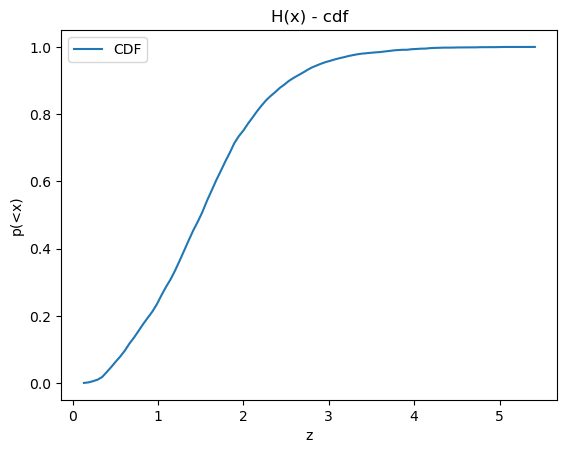

In [9]:
# finding the PDF of the histogram using count values 
pdf = counts / sum(counts) 
  
# using numpy np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
cdf = np.cumsum(pdf) 
  
# plotting PDF and CDF 
#plt.plot(bins[1:], pdf, color="red", label="PDF") 
plt.plot(bins[1:], cdf, label="CDF")
plt.xlabel("z")
plt.ylabel("p(<x)")
plt.title("H(x) - cdf")

plt.legend()
plt.show()

## b)
Let's found the quantile function (H(x)^-1). Make the inverse of H(x).

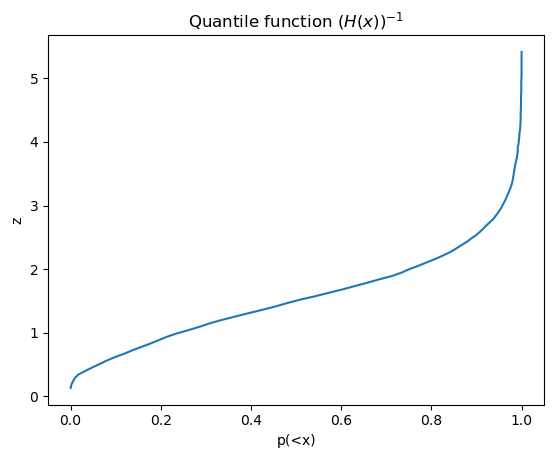

In [10]:
plt.plot(cdf,bins[1:])

plt.xlabel("p(<x)")
plt.ylabel("z")
plt.title("Quantile function $(H(x))^{-1}$")
plt.show()

## c)
Interpolate the cdf and plot the cloned data (histogram after the inverse sampling transfer).

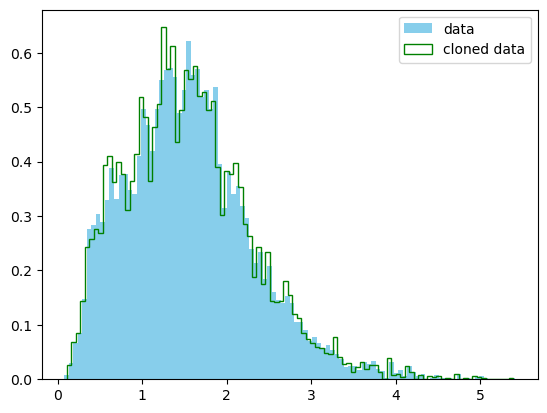

In [11]:
bin_mids = (bins[1:] + bins[:-1]) / 2 # mid location of bins
# set up an interpolation of the inverse cumulative distribution
tck = scipy.interpolate.interp1d(cdf, bin_mids)

# sample evenly along the cumulative distribution, and interpolate
# little hack to make sure no points are generated outside interpolation range.
# not ideal
u = np.random.uniform(min(cdf),max(cdf), 10000) 
x_sample = tck(u)

plt.hist(z, bins =bins, density=True,color='skyblue',label='data');
plt.hist(x_sample, bins =bin_mids, density=True, histtype='step',color='green',label='cloned data');
plt.legend()


- **KS test**

In [12]:
stats.ks_2samp(z,x_sample)

KstestResult(statistic=0.0193, pvalue=0.04822817851247244)